In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report,confusion_matrix

plt.style.use('fivethirtyeight')


In [2]:
df = pd.read_csv(r"C:\Users\Sai ranga reddy\Downloads\emp_promotion.csv")
print('shape of train data{}'.format(df.shape))

shape of train data(54808, 14)


In [3]:
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


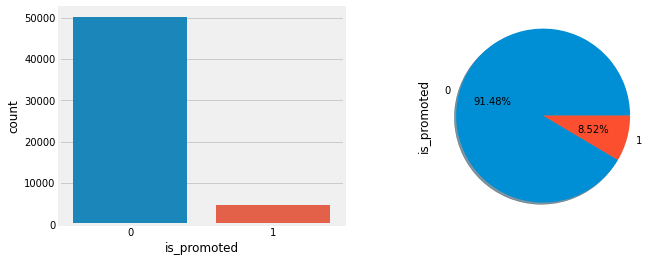

In [4]:
# Data is imbalanced

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(df['is_promoted'])      
plt.subplot(122)
df['is_promoted'].value_counts().plot(kind='pie',autopct = '%.2f%%',shadow=True)
plt.show()

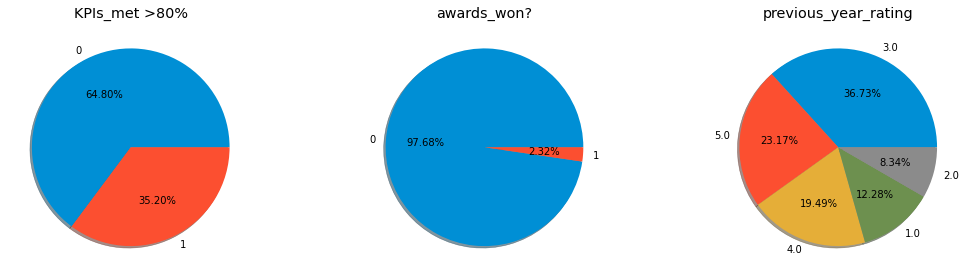

In [5]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
df['KPIs_met >80%'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
df['awards_won?'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
df['previous_year_rating'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.show()

<AxesSubplot:xlabel='avg_training_score'>

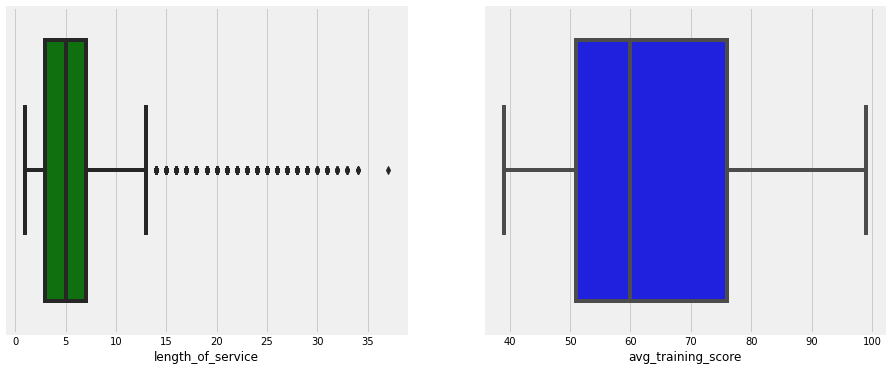

In [6]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(df['length_of_service'],color='g')
plt.subplot(122)
sns.boxplot(df['avg_training_score'],color='b')

<AxesSubplot:xlabel='avg_training_score', ylabel='previous_year_rating'>

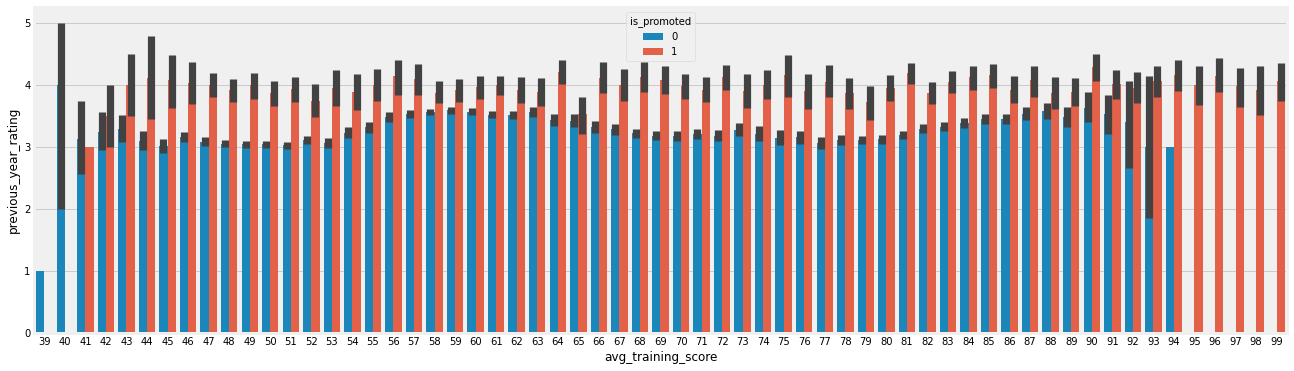

In [7]:
plt.figure(figsize=(20,6))
sns.barplot(df['avg_training_score'],df['previous_year_rating'],df['is_promoted'])

In [8]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [9]:
df = df.drop(['employee_id','gender','region','recruitment_channel'],axis=1)

In [10]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
print(df["education"].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [12]:
mv=df[df["education"].isnull()].index.tolist()
df.drop(mv, axis=0, inplace=True)

In [13]:
df.isnull().sum()

department                 0
education                  0
no_of_trainings            0
age                        0
previous_year_rating    3739
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [14]:
print(df["previous_year_rating"].value_counts())

3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
Name: previous_year_rating, dtype: int64


In [15]:
df["previous_year_rating"]=df["previous_year_rating"].fillna(df["previous_year_rating"].mode()[0])

In [16]:
negative=df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & (df['is_promoted']==1) & (df['avg_training_score']<60)]

In [17]:
negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [18]:
q1=np.quantile(df["length_of_service"],0.25)
q3=np.quantile(df["length_of_service"],0.75)

IQR= q3-q1

ub=(1.5*IQR)+q3
lb=(1.5*IQR)-q1

In [19]:
print("q1" ,q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper bound :',ub)
print('Lower bound :',lb)
print ('skewed df : ',len(df[df[ 'length_of_service' ]>ub]))

q1 3.0
q3 : 8.0
IQR : 5.0
Upper bound : 15.5
Lower bound : 4.5
skewed df :  2298


In [20]:
print ('skewed df : ',len(df[df[ 'length_of_service' ]>ub]))

skewed df :  2298


In [21]:
pd.crosstab([df['length_of_service']>ub],df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,45716,4385
True,2137,161


In [22]:
df['length_of_service']=[ub if x>ub else x for x in df['length_of_service']]

In [23]:
df[ 'education' ].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
54802    False
54803    False
54804    False
54805    False
54807    False
Name: education, Length: 52399, dtype: bool

In [24]:
df['education']=df['education'].replace(("Below Secondary", "Bachelor's","Master's & above"),(1,2,3))

In [25]:
df[ 'education' ]

0        3
1        2
2        2
3        2
4        2
        ..
54802    2
54803    2
54804    3
54805    2
54807    2
Name: education, Length: 52399, dtype: int64

In [26]:
lb = LabelEncoder()
df['department']=lb.fit_transform(df['department'])

In [27]:
x=df.drop('is_promoted',axis=1)
y = df['is_promoted']
print(x.shape)
print(y.shape)

(52399, 9)
(52399,)


In [30]:
!pip install imblearn

     -------------------------------------- 199.3/199.3 KB 3.0 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Sai ranga reddy\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [31]:
from imblearn.over_sampling import SMOTE


In [32]:
sm=SMOTE()
x_resample,y_resample=sm.fit_resample(x,y)

Text(0.5, 1.0, 'After oversampling')

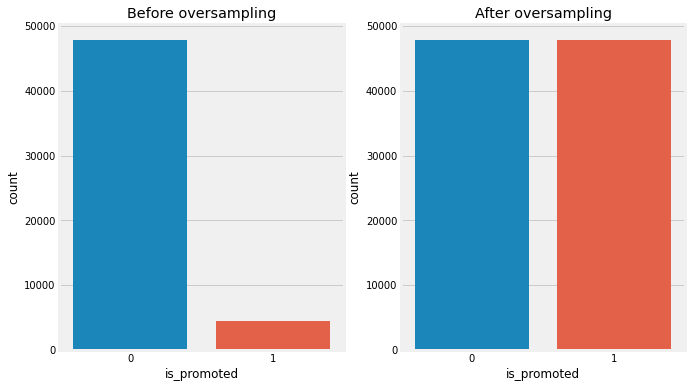

In [33]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(y)
plt.title('Before oversampling')
plt.subplot(122)
sns.countplot(y_resample)
plt.title('After oversampling')

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3,random_state=10)

In [36]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (66994, 9)
Shape of y_train (66994,)
Shape of x_test (28712, 9)
Shape of y_test (28712,)


In [37]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [38]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [39]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [40]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [41]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)

In [42]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[13157  1161]
 [  879 13515]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     14318
           1       0.92      0.94      0.93     14394

    accuracy                           0.93     28712
   macro avg       0.93      0.93      0.93     28712
weighted avg       0.93      0.93      0.93     28712

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[13473   845]
 [  761 13633]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14318
           1       0.94      0.95      0.94     14394

    accuracy                           0.94     28712
   macro avg       0.94      0.94      0.94     28712
weighted avg       0.94      0.94      0.94     28712

-----------------------------------------------

In [43]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [44]:
cv=cross_val_score(rf,x_resample,y_resample,cv=5)

In [45]:
cv
np.mean(cv)

0.944862997822073

In [46]:
pickle.dump(rf,open('model.pkl','wb'))